# Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore") # hide warnings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [3]:
df = pd.read_csv("AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



In [4]:
df.head

<bound method NDFrame.head of                    Datetime   AEP_MW
0       2004-12-31 01:00:00  13478.0
1       2004-12-31 02:00:00  12865.0
2       2004-12-31 03:00:00  12577.0
3       2004-12-31 04:00:00  12517.0
4       2004-12-31 05:00:00  12670.0
...                     ...      ...
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0

[121273 rows x 2 columns]>

# Data Preprocessing

In [5]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(10)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday
2004-12-31 06:00:00,13038.0,12,2004,2004-12-31,06:00:00,53,Friday
2004-12-31 07:00:00,13692.0,12,2004,2004-12-31,07:00:00,53,Friday
2004-12-31 08:00:00,14297.0,12,2004,2004-12-31,08:00:00,53,Friday
2004-12-31 09:00:00,14719.0,12,2004,2004-12-31,09:00:00,53,Friday


In [6]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



# Data Visualizations

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Energy Consumption According to Year')

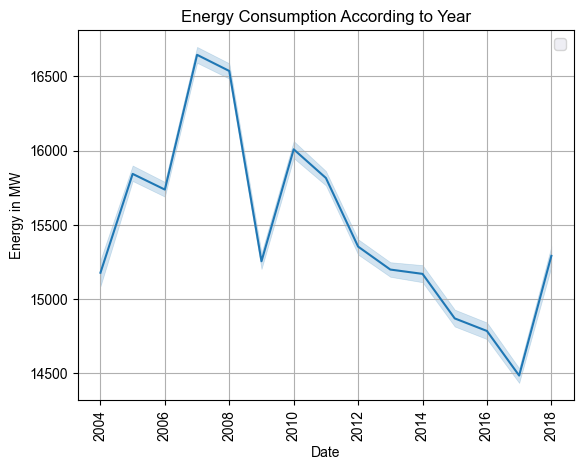

In [7]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=df["Year"], y=df["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(20,10)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


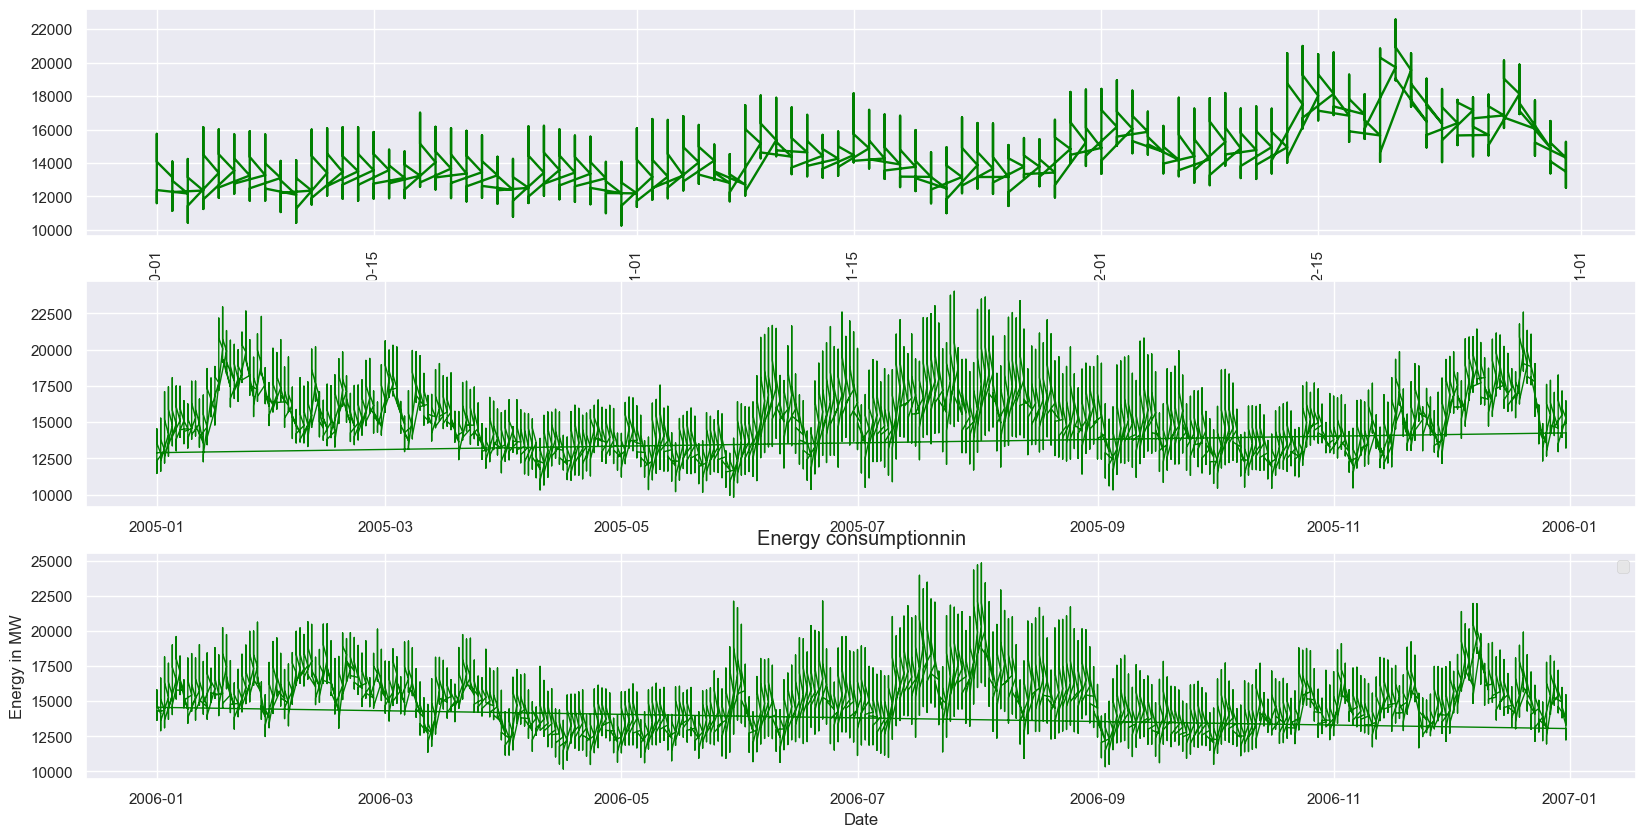

In [8]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2004 = dataset.loc["2004"]["AEP_MW"].to_list()
x_2004 = dataset.loc["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2005 = dataset.loc["2005"]["AEP_MW"].to_list()
x_2005 = dataset.loc["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = dataset.loc["2006"]["AEP_MW"].to_list()
x_2006 = dataset.loc["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (20,10)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Text(0.5, 1.0, 'Energy Distribution')

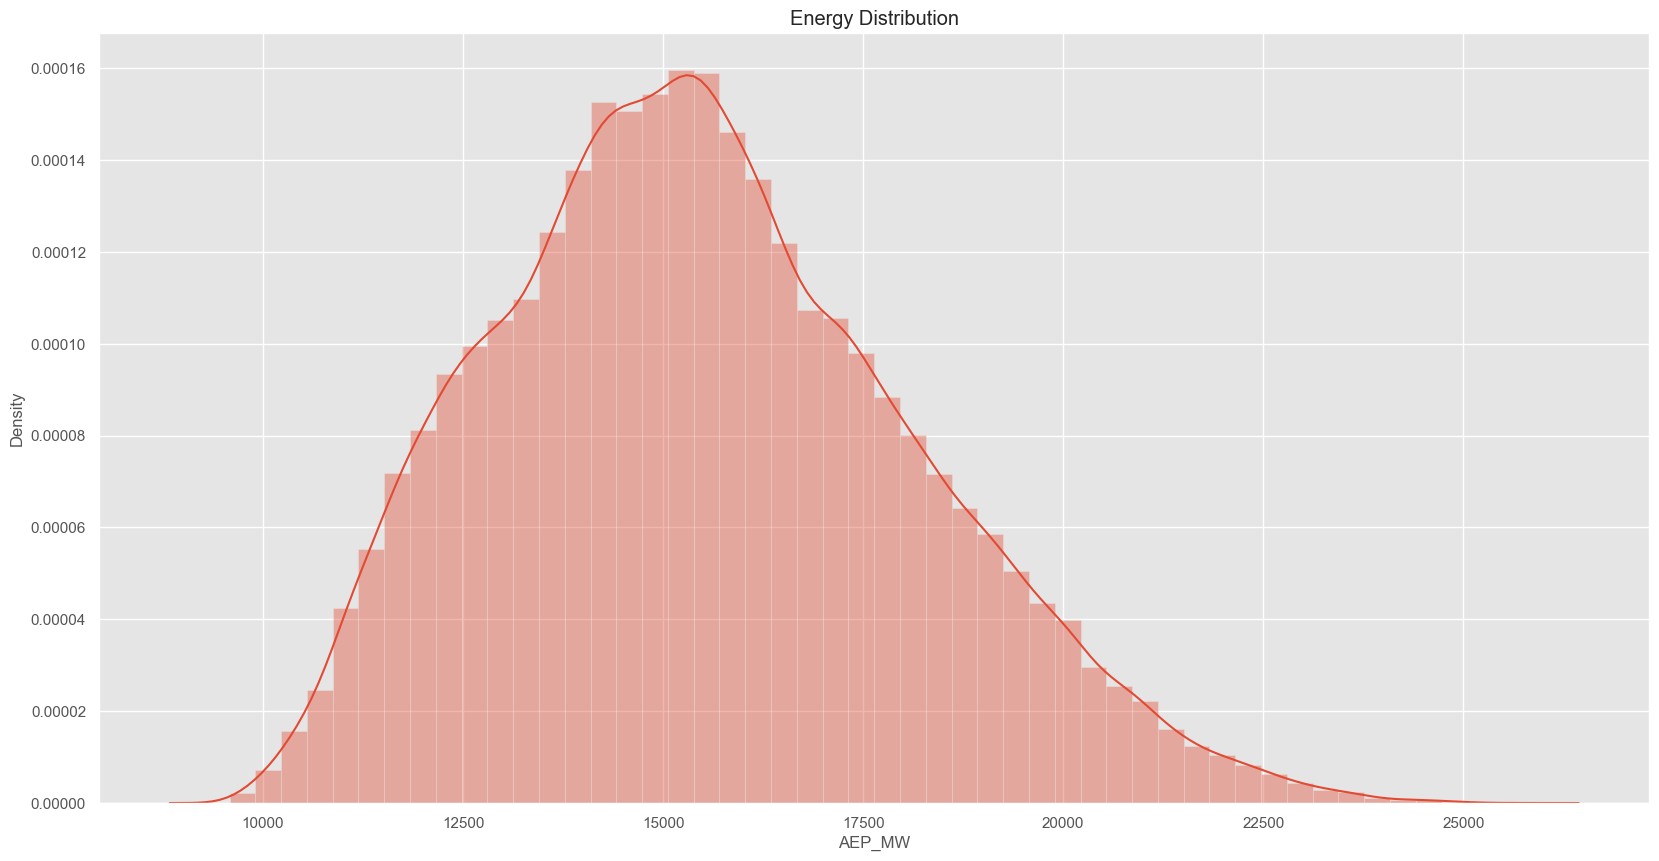

In [9]:
sns.distplot(dataset["AEP_MW"])
plt.title("Energy Distribution")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


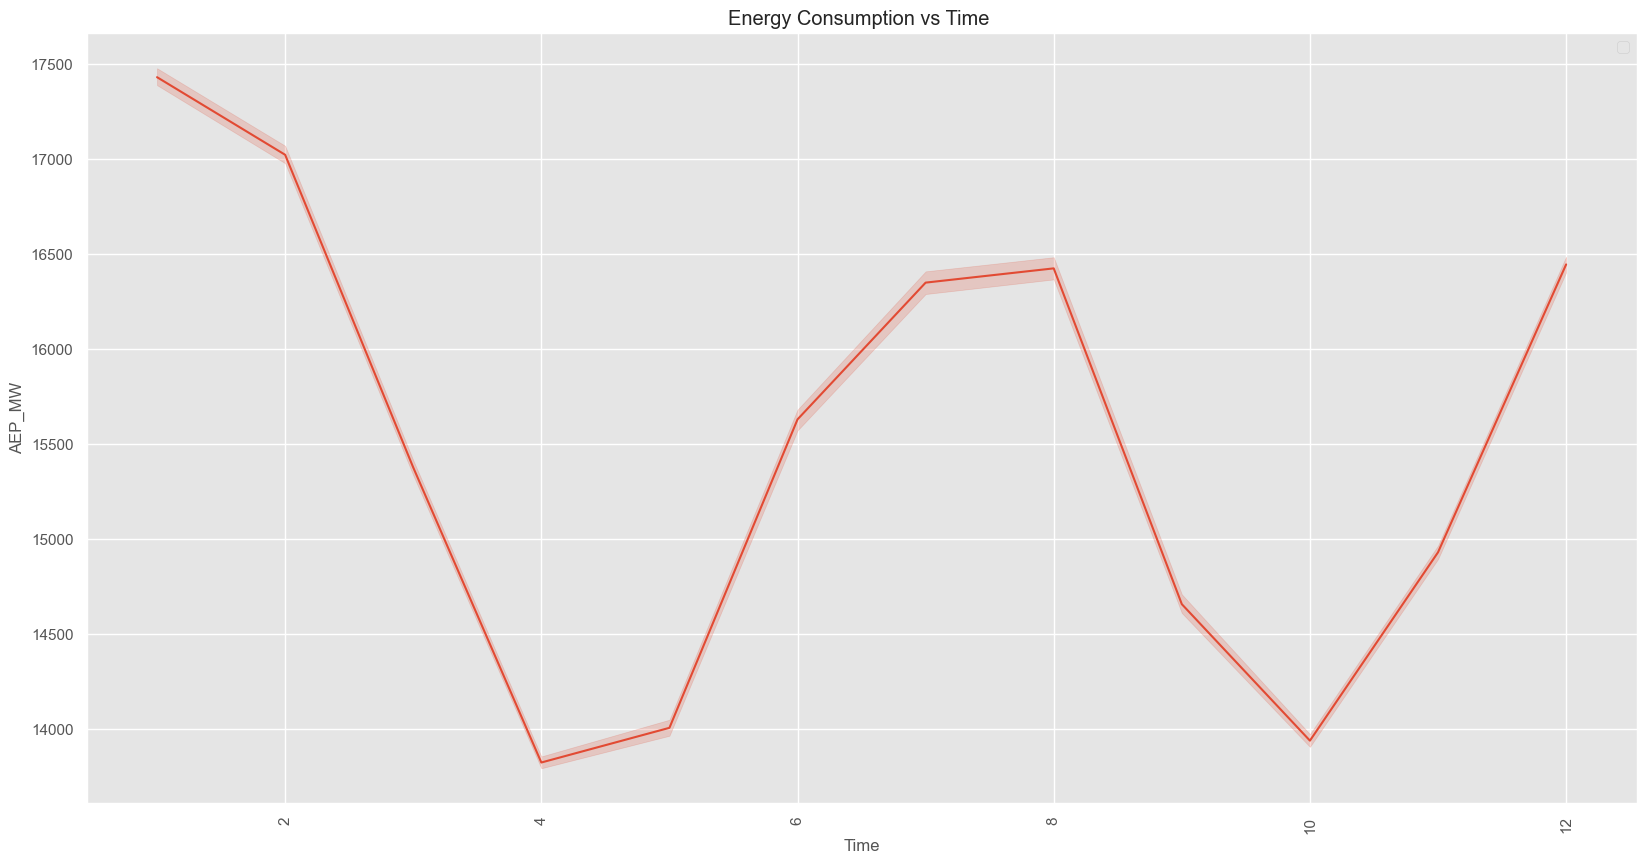

In [10]:
# print(dataset)
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x = df["Month"], y = df["AEP_MW"], data = df)
# sns.relplot(data=df, x="Time", y="AEP_MW", kind="line")
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# Resampleing Data

In [11]:
NewDataSet = dataset.resample('D').mean()

In [12]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape)

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


In [13]:
TestData = NewDataSet.tail(100)
Training_Set = NewDataSet.iloc[:,0:1]
Training_Set = Training_Set[:-60]

TestData,Training_Set,Training_Set

(                  AEP_MW  Month    Year  Week
 Datetime                                     
 2018-04-26  13157.791667    4.0  2018.0  17.0
 2018-04-27  12964.000000    4.0  2018.0  17.0
 2018-04-28  12237.583333    4.0  2018.0  17.0
 2018-04-29  12156.791667    4.0  2018.0  17.0
 2018-04-30  13443.500000    4.0  2018.0  18.0
 ...                  ...    ...     ...   ...
 2018-07-30  15368.083333    7.0  2018.0  31.0
 2018-07-31  15180.291667    7.0  2018.0  31.0
 2018-08-01  15151.166667    8.0  2018.0  31.0
 2018-08-02  15687.666667    8.0  2018.0  31.0
 2018-08-03  14809.000000    8.0  2018.0  31.0
 
 [100 rows x 4 columns],
                   AEP_MW
 Datetime                
 2004-10-01  14284.521739
 2004-10-02  12999.875000
 2004-10-03  12227.083333
 2004-10-04  14309.041667
 2004-10-05  14439.708333
 ...                  ...
 2018-05-31  16741.083333
 2018-06-01  15734.666667
 2018-06-02  14212.166667
 2018-06-03  13824.625000
 2018-06-04  14127.500000
 
 [4995 rows x 1 column

In [14]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [15]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
Train

array([[0.27243207],
       [0.16328467],
       [0.09762599],
       ...,
       [0.26628457],
       [0.23335788],
       [0.25909104]])

In [16]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [17]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

# Create LSTM Model 

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
regressor.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20
155/155 [==============================] - 19s 80ms/step - loss: 0.0248
Epoch 2/20
155/155 [==============================] - 12s 78ms/step - loss: 0.0186
Epoch 3/20
155/155 [==============================] - 13s 82ms/step - loss: 0.0178
Epoch 4/20
155/155 [==============================] - 13s 81ms/step - loss: 0.0166
Epoch 5/20
155/155 [==============================] - 13s 84ms/step - loss: 0.0161
Epoch 6/20
155/155 [==============================] - 12s 77ms/step - loss: 0.0154
Epoch 7/20
155/155 [==============================] - 13s 86ms/step - loss: 0.0153
Epoch 8/20
155/155 [==============================] - 13s 83ms/step - loss: 0.0143
Epoch 9/20
155/155 [==============================] - 13s 81ms/step - loss: 0.0127
Epoch 10/20
155/155 [==============================] - 12s 77ms/step - loss: 0.0116
Epoch 11/20
155/155 [==============================] - 13s 82ms/step - loss: 0.0103
Epoch 12/20
155/155 [==============================] - 13s 86ms/step - loss: 0.0096
E

# Test Data

In [20]:
TestData.head(5)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0
2018-04-28,12237.583333,4.0,2018.0,17.0
2018-04-29,12156.791667,4.0,2018.0,17.0
2018-04-30,13443.500000,4.0,2018.0,18.0


In [21]:
TestData.shape

(100, 4)

In [22]:
NewDataSet.shape

(5055, 4)

In [23]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis = 0)

In [24]:
Df_Total.shape

(5155, 1)

In [25]:
inputs = Df_Total[len(Df_Total)- len(TestData)-60:].values
inputs.shape

(160, 1)

In [26]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

4/4 [==============================] - 4s 56ms/step


In [27]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt = predicted_stock_price
dates = TestData.index.to_list()

In [28]:
Machine_df = pd.DataFrame(data ={
    "Date" : dates,
    "True_MegaWatt" : True_MegaWatt,
    "Predicted_MegaWatt" : [x[0] for x in Predicted_MegaWatt ]
})


Future Predicted

In [29]:
Machine_df

,Date,True_MegaWatt,Predicted_MegaWatt
0,2018-04-26,13157.791667,13798.852539
1,2018-04-27,12964.000000,13521.570312
2,2018-04-28,12237.583333,14750.271484
3,2018-04-29,12156.791667,14094.679688
4,2018-04-30,13443.500000,13611.958984
...,...,...,...
95,2018-07-30,15368.083333,15336.635742
96,2018-07-31,15180.291667,16321.809570
97,2018-08-01,15151.166667,15688.259766
98,2018-08-02,15687.666667,15236.115234


In [30]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


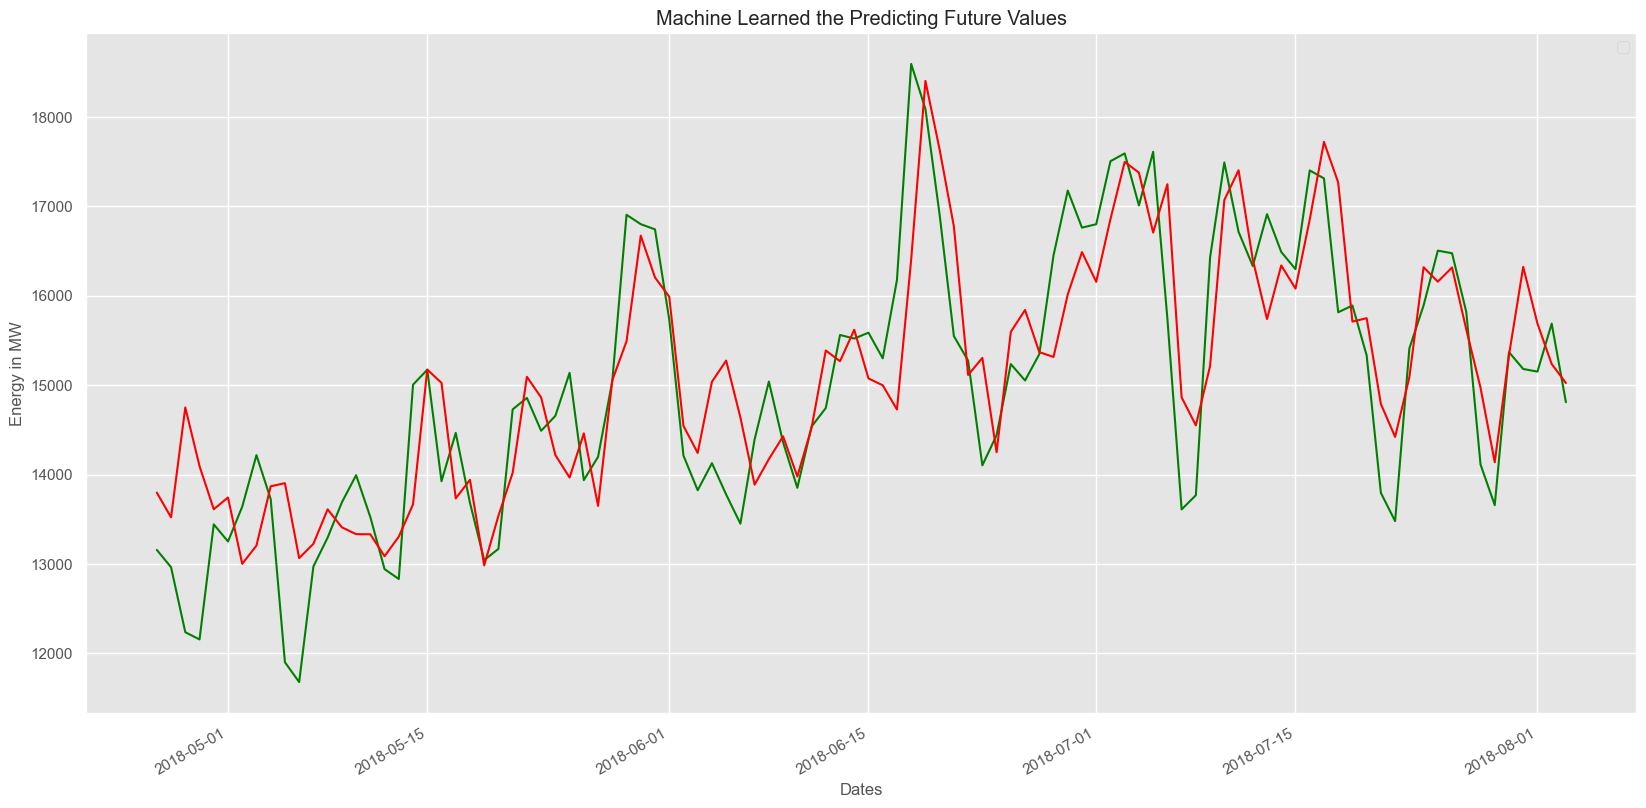

In [31]:
fig = plt.figure()

axl = fig.add_subplot(111)

x = dates 
y= True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x, y, color = "green")
plt.plot(x, y1, color = "red")

plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel('Energy in MW')
plt.title('Machine Learned the Predicting Future Values')
plt.legend()
